In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import os
import cv2

import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album
import segmentation_models_pytorch as smp

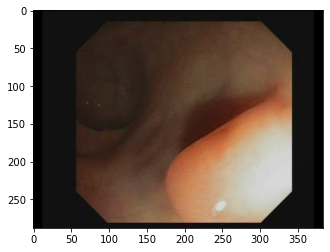

In [3]:
# Display a sample image
img=mpimg.imread('/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/1.jpg')
imgplot = plt.imshow(img)

In [4]:
def read_img(img_path):
    #reading in an image
    image = mpimg.imread(img_path)
    return image

### Save Each Filepath and Filename into List for Each Image

In [5]:
# filepath_list: 
# each element contains a list of two elements
# filepath[0] = filepath, filepath[1] = filename
filepath_list = []
file_annot_list = []
for filename in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/"):
    if filename.endswith(".jpg"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/", filename)
        filepath_list.append([filepath, filename])

for file_name in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/"):
    if file_name.endswith(".xml"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/", file_name)
        file_annot_list.append([filepath, file_name])


### Read and Save Each Image into Image List

In [6]:
image_list = []
for filepath in filepath_list:
    image = read_img(filepath[0])
    image_list.append(image)

### Read and Save Each Annotation into Annotation List

In [7]:
annotation_list = []
for file in file_annot_list:
    annot = file[0]
    annotation_list.append(annot)

In [8]:
len(annotation_list)

28773

In [9]:
# Finding the specific annotation in the xml file
a_list = []
for i in range(28773):
    tree = ET.parse(annotation_list[i])
    root = tree.getroot()
    object = root.find("object")
    if(object):
        polyp_name = object.find("name").text
        a_list.append(polyp_name)
    else:
        a_list.append("Not Specified")

In [10]:
# Finding the unique elements in the list
x = np.array(a_list)
print(np.unique(x))

['Not Specified' 'adenomatous' 'hyperplastic']


In [11]:
def normalize_images(images):
    norm_images = []
    for image in images:
        norm_img = (image / 255.0) - 0.5
        norm_images.append(norm_img)
    return norm_images

In [12]:
img_size = 32

# Scale web images 32x32x3
def scale_images(images, image_size):
    resize_images = []
    for image in images:
        resize_image = cv2.resize(image, (image_size, image_size))
        resize_images.append(resize_image)
    return resize_images


In [13]:
import cv2
image_list_new = []
for filepath in image_list:
    image = scale_images(filepath[0],32)
    image_list_new.append(image)

In [14]:
image_list_norm = []
for filepath in image_list_new:
    image = normalize_images(filepath[0])
    image_list_norm.append(image)

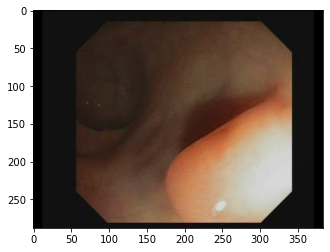

In [15]:
imgplot = plt.imshow(img)

In [17]:
np.shape(image_list_norm[0])

(32, 32)

### Creating a dataframe by combining the Image and Annotation Lists

In [18]:
df = pd.DataFrame(
    {'Image': image_list_norm,
     'Annotation': a_list
    })

In [19]:
df.head()

,Image,Annotation
0,"[[-0.4607843137254902, -0.4607843137254902, -0...",hyperplastic
1,"[[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0...",adenomatous
2,"[[-0.45294117647058824, -0.45294117647058824, ...",hyperplastic
3,"[[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0...",adenomatous
4,"[[-0.45294117647058824, -0.45294117647058824, ...",adenomatous


In [21]:
np.shape(image_list_norm[0])

(32, 32)

In [22]:
# Counting the number of Not Specified and then dropping them 
print(len(df[df['Annotation']=='Not Specified']))
df = df[df.Annotation != 'Not Specified']
print(len(df[df['Annotation']=='Not Specified']))

1725
0


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df['Annotation'] = le.fit_transform(df['Annotation'])

In [66]:
df.head()

,Image,Annotation
0,"[[-0.4607843137254902, -0.4607843137254902, -0...",1
1,"[[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0...",0
2,"[[-0.45294117647058824, -0.45294117647058824, ...",1
3,"[[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0...",0
4,"[[-0.45294117647058824, -0.45294117647058824, ...",0


In [88]:
df = df.Image.apply(pd.Series)\
    .merge(df_melt, right_index = True, left_index = True)

In [89]:
df.drop('Image',axis=1,inplace=True)
df.drop('names',axis=1,inplace=True)

In [94]:
df.apply(pd.Series)\
    .merge(df, right_index = True, left_index = True)

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,Annotation_y
0,"[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....",...,"[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....","[-0.4607843137254902, -0.4607843137254902, -0....",1
1,"[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....",...,"[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....",0
2,"[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...",...,"[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...","[-0.45294117647058824, -0.45294117647058824, -...",1
3,"[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....",...,"[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[-0.5, -0.5, -0.5,

## Train Test Split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Annotation',axis =1),df['Annotation'],test_size=0.2
                                               ,random_state=42)

In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21638, 32)
(21638,)
(5410, 32)
(5410,)


In [74]:
from keras.models import Sequential 
from keras.layers import Activation, Flatten
from keras.layers import Dense, Dropout

In [29]:
import tensorflow as tf

In [32]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Lambda, Cropping2D, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [78]:
model = Sequential()
model.add(Dense(100,activation='relu',input_dim=32))

model.add(Dense(1,activation ='sigmoid'))

In [79]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [96]:
#model.fit(X_train,y_train,validation_split=0.2,epochs=5)